# Training2

In this notebook file, Between80And90-FullPhoto dataset will be read from pkl file.

Input(X) and Output(Y) numpy arrays will be created from pandas dataframes.

The MobileNetV2 model will be loaded with random weights so only the architecture of the MobileNetV2 model will be used for training.

A keras utils Sequence class will be defined so that operations can be performed on the data to be used during the training.

Performance will be checked with Validation data while training model with Training data.

Accuracy and Loss charts will be drawn according to epoch numbers.

The results obtained by evaluating the model with Test data will be printed.

In [1]:
#Libraries are being imported
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt

In [2]:
#Library versions are being printed
print('numpy Version: ' + np.__version__)
print('pandas Version: ' + pd.__version__)
print('tensorflow Version: ' + tf.__version__)
print('matplotlib Version: ' + matplotlib.__version__)

numpy Version: 1.22.3
pandas Version: 1.4.3
tensorflow Version: 2.6.0
matplotlib Version: 3.5.2


In [3]:
#GPU will be used for training
myGPU = tf.test.gpu_device_name()
if myGPU:
    print(myGPU)
else:
    print("Error")

/device:GPU:0


In [4]:
#Person dataframe in Between80And90 is being read from md5 file
personDf = pd.read_pickle("../../../Data/Between80And90/Person.pkl")
personDf

,Name
ID,
0,Abdullah Gul
1,Amelie Mauresmo
2,Angelina Jolie
3,Bill Gates
4,Carlos Menem
5,Carlos Moya
6,Fidel Castro
7,George Robertson
8,Halle Berry


In [5]:
#FullPhoto Training data is being read from md5 file
trainingDf = pd.read_pickle("../../../Data/Between80And90/FullPhoto/Training.pkl")
trainingDf

,PersonID,ImageBGR
0,28,"[[[0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], ..."
1,13,"[[[2, 1, 0], [2, 0, 0], [0, 0, 0], [0, 0, 1], ..."
2,29,"[[[2, 2, 8], [2, 2, 8], [2, 2, 8], [2, 2, 7], ..."
3,1,"[[[0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], ..."
4,16,"[[[5, 0, 3], [5, 0, 3], [4, 0, 3], [4, 0, 3], ..."
...,...,...
524,17,"[[[239, 245, 244], [241, 246, 245], [243, 249,..."
525,30,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
526,13,"[[[12, 19, 58], [14, 19, 58], [14, 19, 58], [1..."
527,23,"[[[9, 68, 87], [3, 59, 83], [6, 55, 89], [9, 5..."


In [6]:
#trainingX is being extracted from trainingDf as wanted shape
#trainingX contains images with pixel values of data type np.uint8 in the range [0, 255]

#Many pre-trained models, including the ones to be used within the scope of this project,
#have been trained with images containing pixel values in the [-1, 1] range
#In this way, the data will be symmetrical and the performance of the Backpropagation algorithm will be increased
#See https://en.wikipedia.org/wiki/Backpropagation
#See also https://stackoverflow.com/questions/59540276/why-in-preprocessing-image-data-we-need-to-do-zero-centered-data
#Therefore, training will be performed by converting pixel values to this range with the simplest method (pixel / 127.5 - 1)

trainingX = (np.array(trainingDf.ImageBGR.values.tolist()) / 127.5) - 1
trainingX.shape

(529, 224, 224, 3)

In [7]:
#trainingY is being extracted from trainingDf as wanted shape
trainingY = np.array(trainingDf.PersonID.values.tolist()).reshape((-1,1))
trainingY.shape

(529, 1)

In [8]:
#FullPhoto Validation data is being read from md5 file
validationDf = pd.read_pickle("../../../Data/Between80And90/FullPhoto/Validation.pkl")
validationDf

,PersonID,ImageBGR
0,36,"[[[84, 37, 15], [83, 36, 14], [83, 36, 14], [8..."
1,27,"[[[0, 3, 4], [0, 3, 4], [0, 2, 5], [0, 1, 5], ..."
2,22,"[[[35, 94, 109], [36, 96, 110], [37, 97, 113],..."
3,33,"[[[241, 246, 245], [241, 246, 245], [239, 244,..."
4,26,"[[[73, 95, 130], [77, 100, 134], [78, 103, 137..."
...,...,...
116,8,"[[[108, 42, 7], [109, 43, 8], [110, 44, 9], [1..."
117,29,"[[[1, 1, 1], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
118,5,"[[[20, 15, 30], [18, 13, 28], [17, 12, 27], [1..."
119,2,"[[[244, 246, 234], [245, 247, 235], [245, 247,..."


In [9]:
#validationX is being extracted from validationDf as wanted shape
#validationX contains images with pixel values of data type np.uint8 in the range [0, 255]

#Many pre-trained models, including the ones to be used within the scope of this project,
#have been trained with images containing pixel values in the [-1, 1] range
#In this way, the data will be symmetrical and the performance of the Backpropagation algorithm will be increased
#See https://en.wikipedia.org/wiki/Backpropagation
#See also https://stackoverflow.com/questions/59540276/why-in-preprocessing-image-data-we-need-to-do-zero-centered-data
#Therefore, training will be performed by converting pixel values to this range with the simplest method (pixel / 127.5 - 1)

validationX = (np.array(validationDf.ImageBGR.values.tolist()) / 127.5) - 1
validationX.shape

(121, 224, 224, 3)

In [10]:
#validationY is being extracted from validationDf as wanted shape
validationY = np.array(validationDf.PersonID.values.tolist()).reshape((-1,1))
validationY.shape

(121, 1)

In [11]:
#MobileNetV2 model with the None weights parameter is being load
#Thus,  architecture of the MobileNetV2 model is being load with random weights
#This way the model can be trained from scratch

#The original MobileNetV2 model was trained with images with size of (224, 224, 3) 
#in RGB color order and pixel values of [-1, 1] (zero centered) as default
#See https://keras.io/api/applications/mobilenet/ for more information

#Since only the architecture of the MobileNetV2 model is being loaded, the loaded model is not a pre-trained model
#Therefore, training can be performed regardless of the data type of the MobileNetV2 pre-trained model

#Images of dataset saved as size of (224, 224, 3) in BGR color order and pixel values of [0, 255]
#Pixel values were converted to [-1, 1] range to improve the performance of the Backpropagation algorithm
#But the color order of the images will not be changed and will be used in the BGR color order

model = tf.keras.applications.MobileNetV2(include_top = False, weights = None, input_shape = ((224, 224, 3)))
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
_______________________________________________________________________________

In [12]:
#The architecture of MobileNetV2 model is being connected to the Average Pooling layer
#A dropout layer is added to the the model to prevent overfitting,
#and the model is completed with the addition of the output layer
model = tf.keras.models.Sequential([
    model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(personDf.shape[0], activation = tf.nn.softmax)
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 40)                51240     
Total params: 2,309,224
Trainable params: 2,275,112
Non-trainable params: 34,112
_________________________________________________________________


In [13]:
#Model is being compiled with Adam optimizer
#Adam optimizer is a common used optimizer
#See https://keras.io/api/optimizers/adam/
#See also https://towardsdatascience.com/7-tips-to-choose-the-best-optimizer-47bb9c1219e
#SparseCategoricalCrossentropy loss function is being used because of the label format of the data
#SparseCategoricalAccuracy is being used as metric because of the label format of the data
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy(name = 'accuracy')]
)

In [14]:
#A class inherited from keras utils Sequence is being created
class FitSequence(tf.keras.utils.Sequence):
    
    #Constructor method is being defined
    def __init__(self, image, label, batchSize):
        self.image, self.label = image, label
        self.batchSize = batchSize
        self.index = np.arange(self.image.shape[0])
    
    #__len__ method is being defined
    #This method will be used by the model to show the amount of progress of each epoch
    def __len__(self):
        return int(np.ceil(self.image.shape[0] / float(self.batchSize)))
    
    #__getitem__ method is being defined
    #The model will retrieve the batches it will use during training by calling this method
    #With this method, the data to be used by the model can be manipulated
    def __getitem__(self, idx):
        
        #When the model requests data, the next batch size will be selected based on index array
        indexPart = self.index[idx * self.batchSize : (idx + 1) * self.batchSize]
        
        batchX = self.image[indexPart]
        batchY = self.label[indexPart]
        return np.array(batchX), np.array(batchY)
    
    #on_epoch_end method is being defined
    #The model will call this method after each epoch is ended
    def on_epoch_end(self):
        
        #At the end of the epoch, the index array is being shuffled 
        #so that the data in the next epoch is returned in different orders
        np.random.shuffle(self.index)

In [15]:
#model is being trained with 50 epochs and 16 batchSize using GPU
#A small batchSize value is being chosen to prevent GPU memory problem
#Large batchSize reduce training time while also generally providing better results
with tf.device(myGPU):
    trainingHistory = model.fit(
        FitSequence(trainingX, trainingY, 16),
        epochs = 50,
        validation_data = FitSequence(validationX, validationY, 16)
    )

Epoch 1/50
34/34 [==============================] - 34s 716ms/step - loss: 3.9641 - accuracy: 0.0397 - val_loss: 3.6894 - val_accuracy: 0.0331
Epoch 2/50
34/34 [==============================] - 20s 597ms/step - loss: 3.5878 - accuracy: 0.0737 - val_loss: 3.6899 - val_accuracy: 0.0413
Epoch 3/50
34/34 [==============================] - 20s 598ms/step - loss: 3.2216 - accuracy: 0.1399 - val_loss: 3.6993 - val_accuracy: 0.0496
Epoch 4/50
34/34 [==============================] - 20s 596ms/step - loss: 2.8312 - accuracy: 0.2004 - val_loss: 3.7194 - val_accuracy: 0.0496
Epoch 5/50
34/34 [==============================] - 20s 603ms/step - loss: 2.5998 - accuracy: 0.2514 - val_loss: 3.7445 - val_accuracy: 0.0496
Epoch 6/50
34/34 [==============================] - 21s 616ms/step - loss: 2.2174 - accuracy: 0.3403 - val_loss: 3.7990 - val_accuracy: 0.0496
Epoch 7/50
34/34 [==============================] - 21s 614ms/step - loss: 2.0144 - accuracy: 0.4083 - val_loss: 3.9489 - val_accuracy: 0.0496

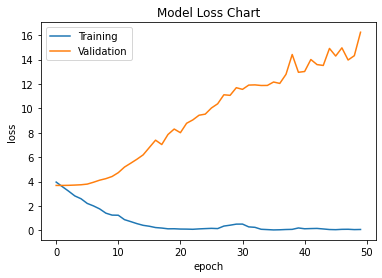

In [16]:
#Loss Chart is being drawn

#Chart Values
plt.plot(trainingHistory.history['loss'])
plt.plot(trainingHistory.history['val_loss'])

#Chart Tittle
plt.title('Model Loss Chart')

#Chart Labels
plt.ylabel('loss')
plt.xlabel('epoch')

#Chart Lines
plt.legend(['Training', 'Validation'], loc='upper left')

#Show Method
plt.show()

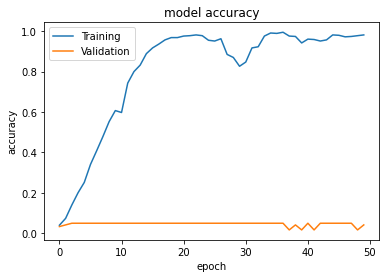

In [17]:
#Loss Chart is being drawn

#Chart Values
plt.plot(trainingHistory.history['accuracy'])
plt.plot(trainingHistory.history['val_accuracy'])

#Chart Tittle
plt.title('model accuracy')

#Chart Labels
plt.ylabel('accuracy')
plt.xlabel('epoch')

#Chart Lines
plt.legend(['Training', 'Validation'], loc='upper left')

#Show Method
plt.show()

In [18]:
#FullPhoto Test data is being read from md5 file
testDf = pd.read_pickle("../../../Data/Between80And90/FullPhoto/Test.pkl")
testDf

,PersonID,ImageBGR
0,1,"[[[100, 142, 119], [100, 142, 119], [100, 142,..."
1,13,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
2,1,"[[[0, 0, 3], [0, 0, 2], [0, 0, 1], [1, 0, 1], ..."
3,9,"[[[99, 128, 137], [99, 128, 137], [99, 128, 13..."
4,20,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
...,...,...
115,34,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
116,31,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
117,11,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
118,14,"[[[2, 0, 1], [2, 0, 1], [2, 0, 1], [2, 0, 1], ..."


In [19]:
#testX is being extracted from testDf as wanted shape
#Pixel values are being converted  to the [-1, 1] range with the simplest method (pixel / 127.5 - 1)
testX = (np.array(testDf.ImageBGR.values.tolist()) / 127.5) - 1
testX.shape

(120, 224, 224, 3)

In [20]:
#testY is being extracted from testDf as wanted shape
testY = np.array(testDf.PersonID.values.tolist()).reshape((-1,1))
testY.shape

(120, 1)

In [21]:
#Model is being evaluated with test data
#Sequence class is being also used for evaluation to convert test data into the same format as training data
testResult = model.evaluate(FitSequence(testX, testY, 16))

8/8 [==============================] - 2s 283ms/step - loss: 16.3407 - accuracy: 0.0083


In [22]:
#Test Loss is being Printed
print('Test Loss: ' + str(testResult[0]))

Test Loss: 16.340749740600586


In [23]:
#Test Accuracy is being Printed
print('Test Accuracy: ' + str(testResult[1]))

Test Accuracy: 0.008333333767950535


# Training2 Inference

By looking at the charts, it can be seen that learning does not take place.

The loss value, decreased as it should for the Training data, while there was no smooth decrease for the Validation data.

The accuracy value, increased as it should for the Training data while there was no smooth increase for the Validation data.

Training accuracy increased above 95% while validation accuracy remained around 4%, this indicates overfitting.

In this case, it can be said that Feature Extraction Layers cannot be trained properly because the number of data is very small.

The Feature Extraction Layers are cannot sufficiently generalize the information obtained from the images.

Performance can be improved by trying Hyperparameter Optimization methods.

See https://en.wikipedia.org/wiki/Hyperparameter_optimization.